In [748]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error




In [749]:
# Evaluation metrics
# MAPE mean_absolute_percentage_error
def regMAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1.))) * 100
# SMAPE symmetric_mean_absolute_percentage_error
def regSMAPE(y_true, y_pred):
    return np.mean(np.abs(2 * (y_true - y_pred) / (y_true + y_pred))) * 100
# PE percentage_error
def regPE(y_true, y_pred):
    return ((y_true - y_pred) / y_true) * 100
# AE Error
def regAE(y_true, y_pred):
    return np.abs(y_true - y_pred)
# MAE mean_absolute_error
def regMAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))
# RMSE root_mean_square_error
def regRMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
# RMSPE root_mean_square_percent_error
def regRMSPE(y_true, y_pred):
    return np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))



# print_error
def regPrintErr(y_true, y_pred):
    print('MAPE: {}'.format(regMAPE(y_true, y_pred)))
    print('MAE: {}'.format(regMAE(y_true, y_pred)))
    print('RMSE: {}'.format(regRMSE(y_true, y_pred)))

About this file
1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

In [835]:

df = pd.read_csv('./housing.csv')

In [836]:
#locating nulls
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [837]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#207 districts are missing the 'total bedroom' feature. we will place the mean value of this feature 
instead of this  nulls.

In [838]:
df['total_bedrooms'].median()

435.0

In [843]:
# replacing null values in total bedroom  with median
#df['total_bedrooms'].replace({0: np.nan}, inplace=True)
#total_bedrooms_mean = np.mean(df['total_bedrooms'])
df['total_bedrooms'].replace({np.nan: df['total_bedrooms'].median()}, inplace=True)
#

In [839]:

df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [844]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [845]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [846]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [730]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,35682.000000,6082.000000,15.000100,500001.000000


In [765]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Highest positive corolation coefficient is median income. Meaning that house median value go up when median income goes up.


In [927]:
corr.sort_values

<bound method DataFrame.sort_values of                     longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069120 -0.066484           -0.319026     0.927058   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   
ocean prox class    -0.273325  0.501975           -0.122954     0.013503   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069120    0.099773 

In [709]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [715]:
#Creating a class for Ocean proximity
#Accordinbg to my experiance Ocean view and proximity will effect house price
def create_fare_class(x):
    if x == '<1H OCEAN':
        opc = 1
    elif x =='NEAR OCEAN':
        opc = 2
    elif x =='NEAR BAY':
        opc = 3
    elif x =='INLAND':
        opc = 4
    else:
        opc = 5
    return opc

In [848]:
#Creating a clas for ocean proximity in case we want to feed it into ML
df['ocean prox class']= df['ocean_proximity'].apply(create_fare_class)
df[:14197]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean prox class
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
14192,-117.07,32.69,20.0,2192.0,406.0,1766.0,393.0,4.0921,135000.0,NEAR OCEAN,2
14193,-117.06,32.70,12.0,3943.0,737.0,3280.0,751.0,4.1120,141400.0,NEAR OCEAN,2
14194,-117.04,32.71,28.0,5274.0,991.0,3727.0,961.0,3.5700,109800.0,NEAR OCEAN,2
14195,-117.05,32.71,25.0,3292.0,608.0,2266.0,592.0,3.2986,119200.0,NEAR OCEAN,2


In [849]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean prox class
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,2.303828
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,1.316477
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,1.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,2.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


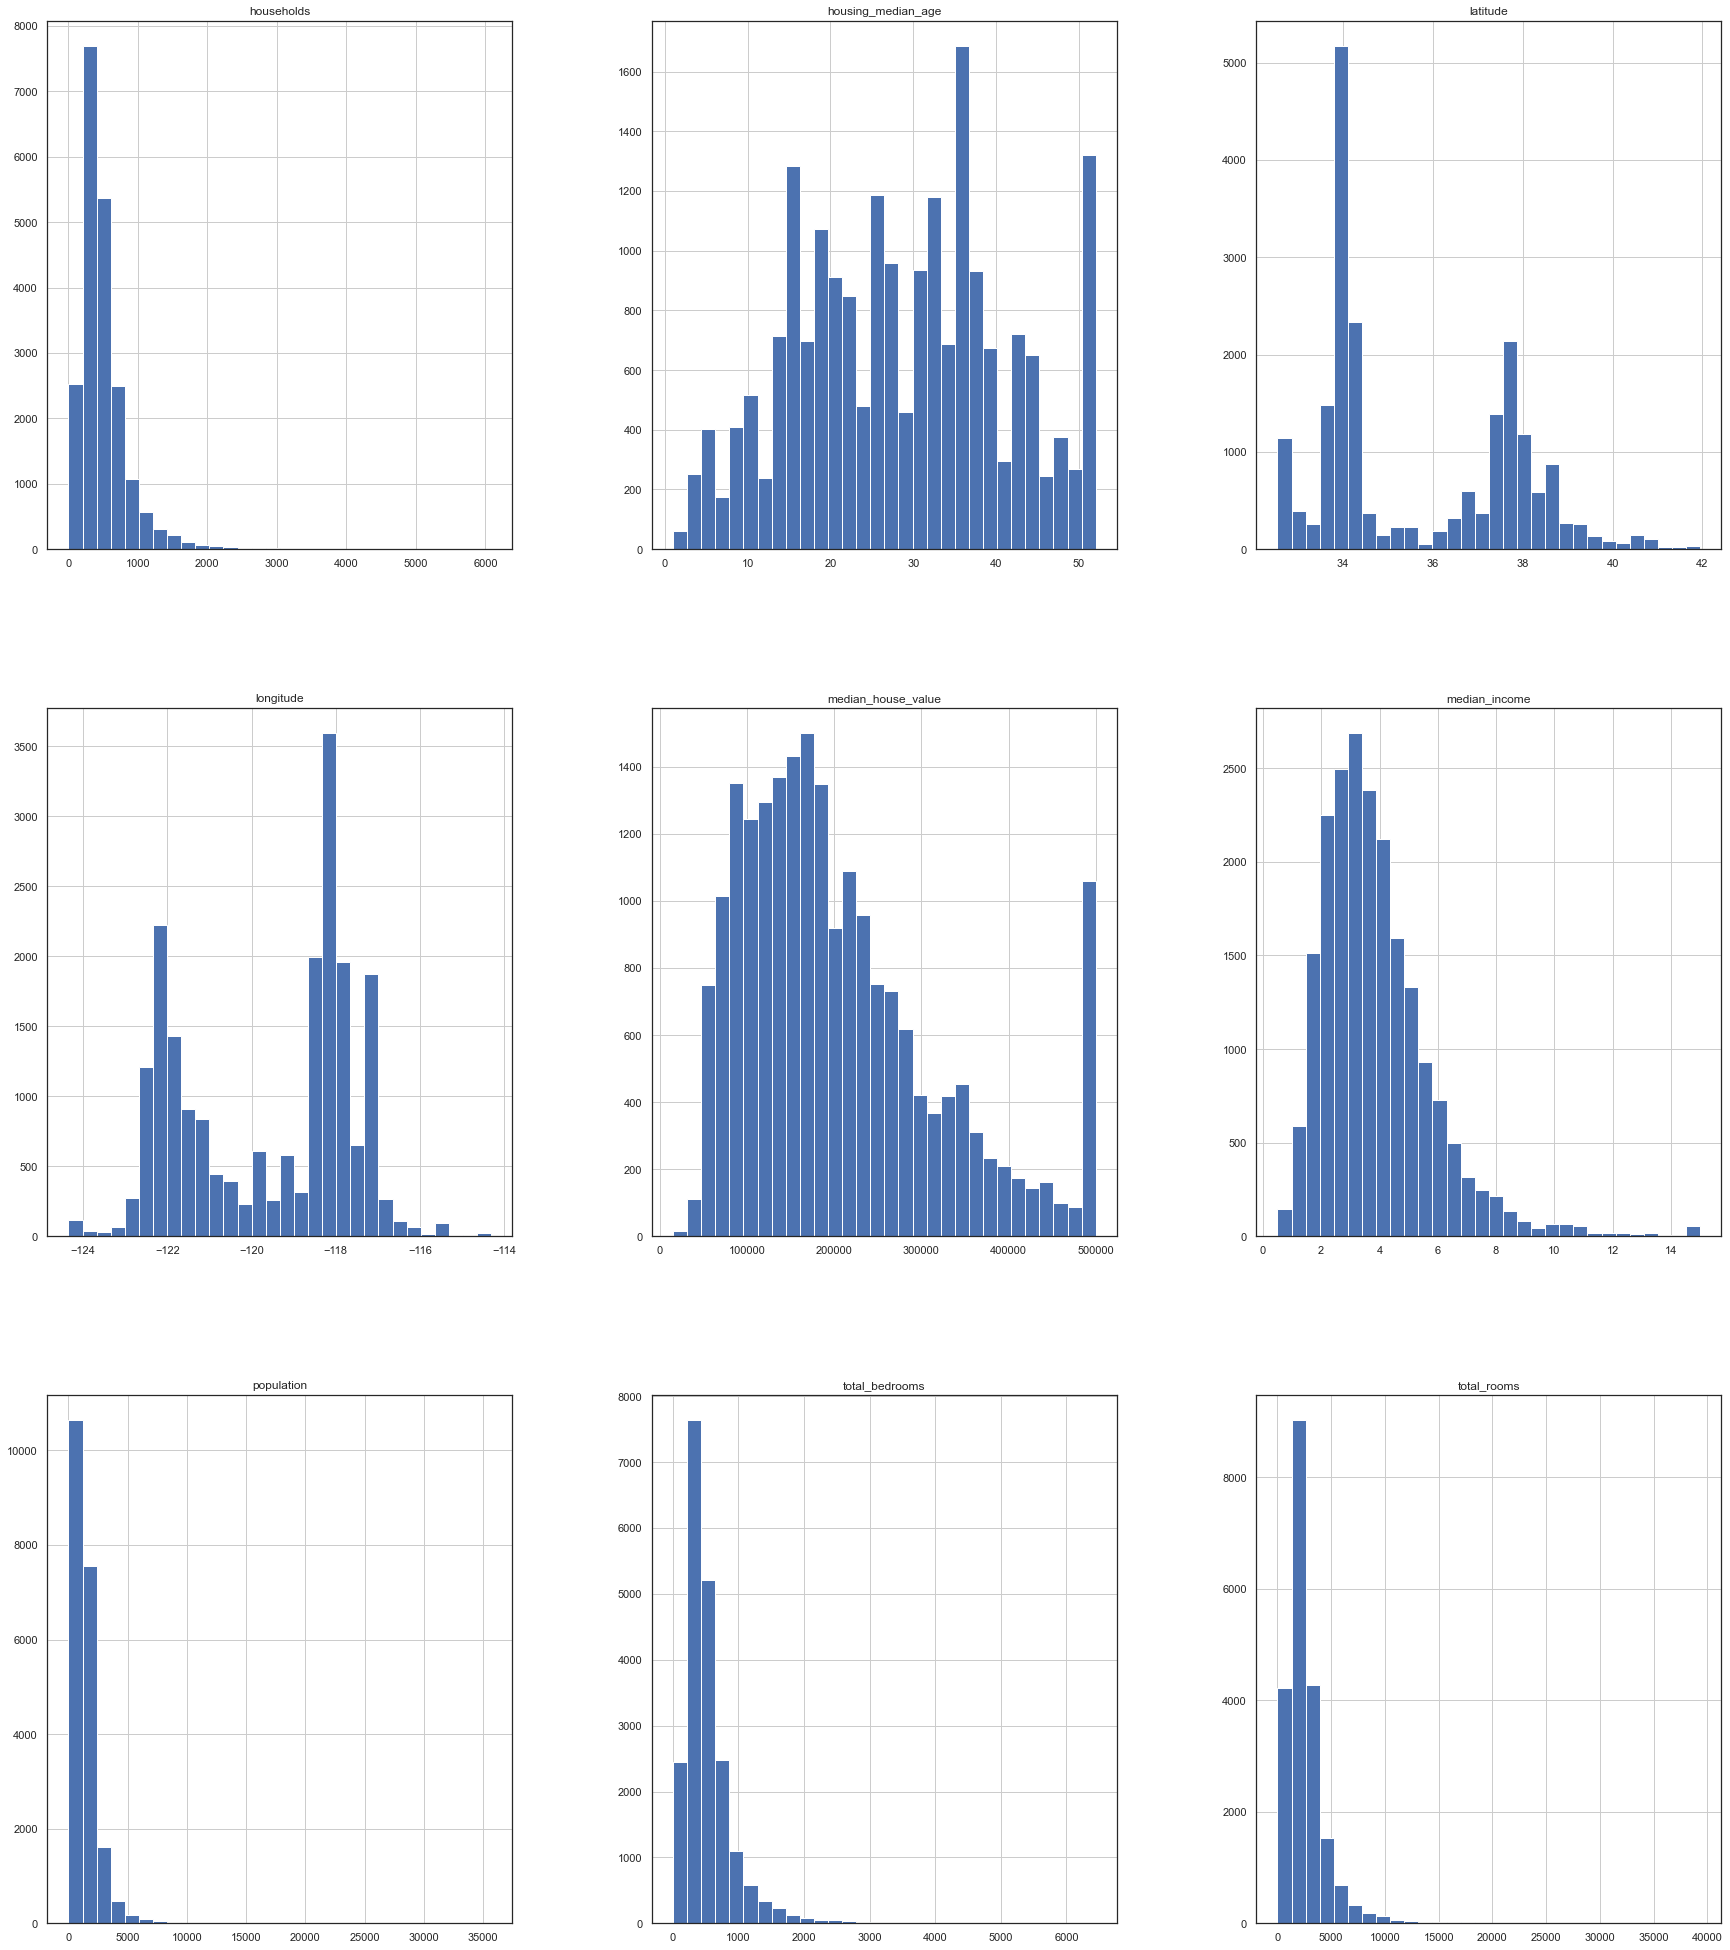

In [810]:
%matplotlib inline
_ = df.hist(bins=30, figsize=(30,35))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


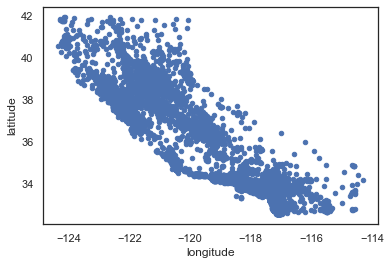

In [711]:
df.plot(kind="scatter", x='longitude', y='latitude')

# We can see the maop shape of california.

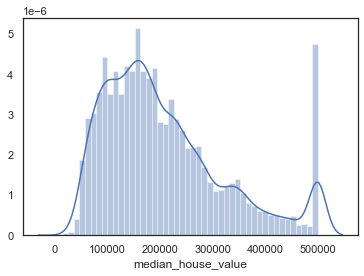

In [712]:
#just by judging from the plot we can see a littile skew to the right wich can couse some problem in ML
sns.distplot(df['median_house_value'])

[Text(0.5, 0, 'Ocean Proximity\n ← Low       High  →')]

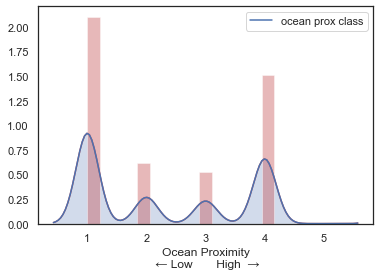

In [850]:

ax = sns.distplot(df['ocean prox class'],color='r')
ax = sns.kdeplot(df['ocean prox class'], shade=True)
ax.set(xlabel = 'Ocean Proximity\n ← Low       High  →')

In [812]:
#number of Maximium house value houses
len(df[df.loc[:, 'median_house_value']>= 500000])

992

In [851]:
df[df.loc[:, 'median_house_value']>= 500000].max()

longitude                -116.43
latitude                   38.91
housing_median_age            52
total_rooms                18132
total_bedrooms              5419
population                  7431
households                  4930
median_income            15.0001
median_house_value        500001
ocean_proximity       NEAR OCEAN
ocean prox class               4
dtype: object

In [720]:
df.loc[:, 'median_house_value'].value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
303200.0      1
307900.0      1
383200.0      1
360800.0      1
405500.0      1
Name: median_house_value, Length: 3842, dtype: int64

In [925]:
corr = df.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean prox class
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,-0.273325
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,0.501975
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,-0.122954
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,0.013503
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,-0.015979
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,-0.057706
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,-0.046604
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,-0.218582
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,-0.400620
ocean prox class,-0.273325,0.501975,-0.122954,0.013503,-0.015979,-0.057706,-0.046604,-0.218582,-0.400620,1.000000


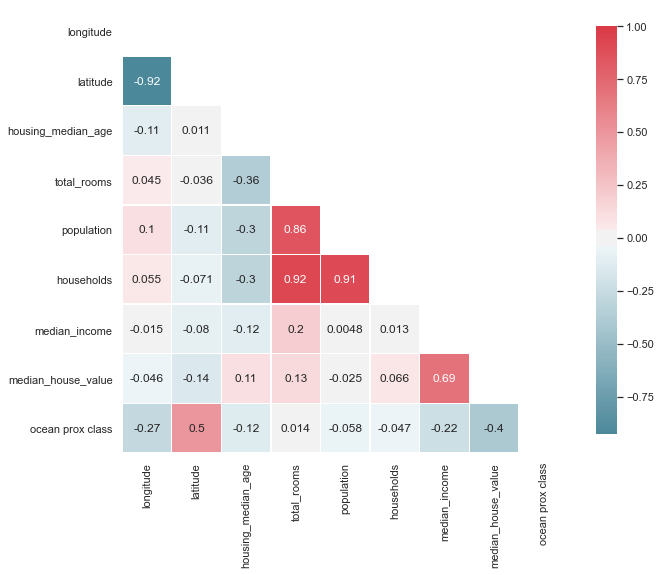

In [457]:
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

In [852]:
#Setting Target

y = df['median_house_value'] 


In [853]:
#Keeping onliy numeric values and excluding target feture from X

X = df.select_dtypes(exclude=['object'])
X = X.drop(['median_house_value'], axis=1)


In [913]:
#Dropping columns (longitude, latitude, population,households,median_income) - this dosen't look like they'll effect house value
#X =  X.drop(['longitude', 'latitude', 'population','households'], axis=1)
#X =  X.drop(['total_bedrooms'], axis=1)


X

,housing_median_age,total_rooms,total_bedrooms,median_income,ocean prox class
0,41.0,880.0,129.0,8.3252,3
1,21.0,7099.0,1106.0,8.3014,3
2,52.0,1467.0,190.0,7.2574,3
3,52.0,1274.0,235.0,5.6431,3
4,52.0,1627.0,280.0,3.8462,3
...,...,...,...,...,...
20635,25.0,1665.0,374.0,1.5603,4
20636,18.0,697.0,150.0,2.5568,4
20637,17.0,2254.0,485.0,1.7000,4
20638,18.0,1860.0,409.0,1.8672,4


In [928]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

In [857]:
# Train-Test Split 80/20 %

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [777]:
y_train.head()

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64

In [887]:
X_train.head()

,housing_median_age,total_rooms,total_bedrooms,median_income,ocean prox class
14196,33.0,3126.0,627.0,3.2596,2
8267,49.0,3382.0,787.0,3.8125,2
17445,4.0,1897.0,331.0,4.1563,2
14265,36.0,1421.0,367.0,1.9425,2
2271,43.0,2382.0,431.0,3.5542,4


In [858]:
reg_base = linear_model.LinearRegression() 
reg_base.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [859]:
y_pred_base = reg_base.predict(X_test)

In [593]:
y_pred_base

array([189491.83273346, 212581.30790553, 257166.42402698, ...,
       216800.45107481, 217636.98609105, 179614.17493397])

In [860]:
reg_base.coef_

array([ 1.67332209e+03, -1.83455244e+01,  1.19081012e+02,  4.49962746e+04,
       -1.81574928e+04])

In [861]:
regPrintErr(y_test, y_pred_base)

MAPE: 31.63510562680434
MAE: 55439.42222839646
RMSE: 76168.56619465543


In [862]:
#feture scaling
standard_scalling = StandardScaler()
X_train_scalled = standard_scalling.fit_transform(X_train)
X_test_scalled = standard_scalling.transform(X_test)

In [863]:
## Scaled features

reg_base_scaled = linear_model.LinearRegression() 
reg_base_scaled.fit(X_train_scalled, y_train)

y_pred_base_scaled = reg_base_scaled.predict(X_test_scalled)

regPrintErr(y_test, y_pred_base_scaled)

MAPE: 31.635105626804112
MAE: 55439.42222839639
RMSE: 76168.56619465543


In [864]:
reg_base_scaled.coef_

array([ 21087.40193383, -39893.8268941 ,  49894.27829764,  85683.53751252,
       -23912.48226869])

In [865]:
y_pred_base

array([ 79879.7563208 , 100116.83563228, 181507.39950561, ...,
       438468.02067968, 133262.48305212, 203310.01867577])

In [498]:
y_pred_base_scaled

array([134191.18614252, 153996.43050353, 221567.20248073, ...,
       261824.82903922, 156479.69591612, 229908.01178225])

In [105]:
reg_base_scaled.predict(X_test_scalled)

array([ 51298.04782456, 158264.89398474, 310382.88709281, ...,
       450795.23477241, 131782.63896841, 181482.83952621])

In [866]:
reg_base.predict(X_test)

array([ 79879.7563208 , 100116.83563228, 181507.39950561, ...,
       438468.02067968, 133262.48305212, 203310.01867577])

In [500]:
reg_base.score(X_train, y_train)

0.19207344534221274

In [501]:
reg_base.score(X_test, y_test)

0.19785693609833155

In [886]:
ap = pd.DataFrame({'Actual': y_test, 'Predicted Median House Value': y_pred_base})
#ap.set_index('Actual', inplace=True)
ap.head(25)

,Actual,Predicted Median House Value
20046,47700.0,79879.756321
3024,45800.0,100116.835632
15663,500001.0,181507.399506
20484,218600.0,275126.365527
9814,278000.0,207697.713061
13311,158700.0,141017.145724
7113,198200.0,308252.519433
7668,157500.0,249648.674470
18246,340000.0,188955.925340
5723,446600.0,442062.965901


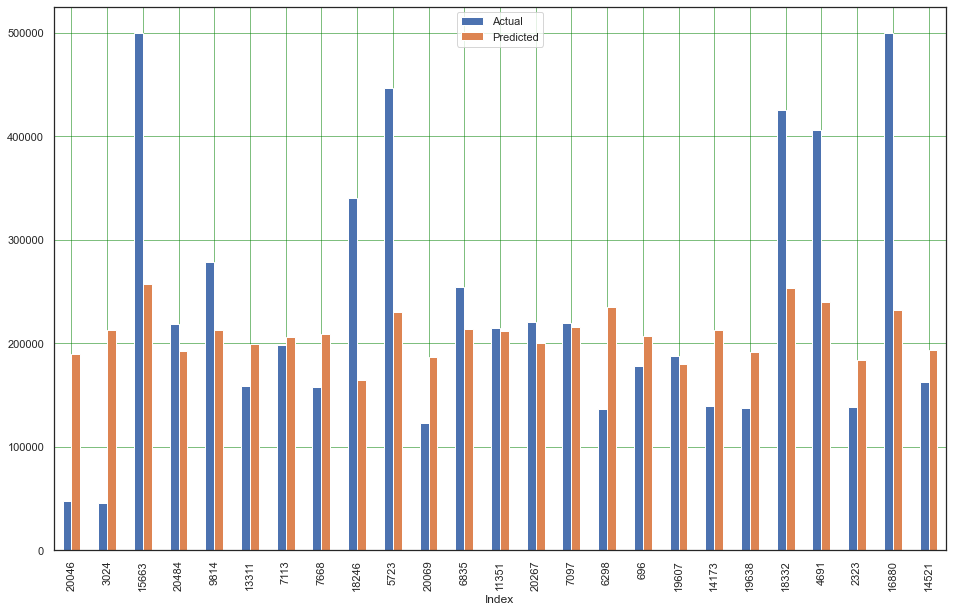

In [601]:



ap1 = ap.head(25)
ap1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Index')
plt.show()

In [868]:
ap = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_base_scaled})
ap.head()

,Actual,Predicted
20046,47700.0,79879.756321
3024,45800.0,100116.835632
15663,500001.0,181507.399506
20484,218600.0,275126.365527
9814,278000.0,207697.713061


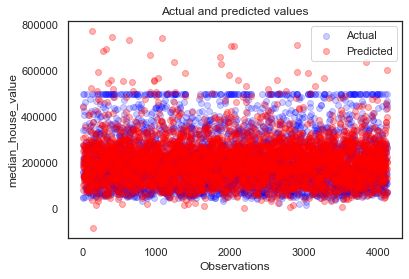

In [885]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.2)
ax.scatter(x = range(0, y_pred_base.size), y=y_pred_base, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('median_house_value')
plt.legend()
plt.show()

In [876]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC

lasso = linear_model.Lasso()
ridge = linear_model.Ridge()


In [877]:
#error function
lasso_cv_results = cross_validate(lasso, X_train_scalled , y_train, cv=5)

In [878]:
lasso_cv_results['test_score']

array([0.59192273, 0.58623656, 0.58504422, 0.58514834, 0.58860667])

In [879]:
lasso_cv_results = cross_validate(lasso, X_train , y_train, cv=5)

In [880]:
lasso_cv_results['test_score']

array([0.59192408, 0.58623586, 0.58504493, 0.58514691, 0.58860669])

In [881]:
residuals = y_test.values - y_pred_base

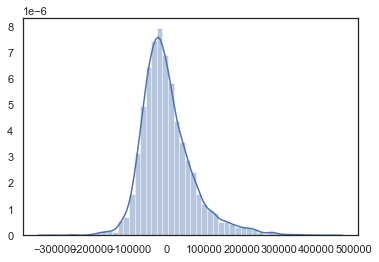

In [603]:
#Normal distribution of the errors tells us that 
sns.distplot(residuals)


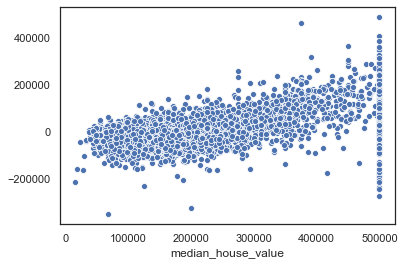

In [882]:
sns.scatterplot(y_test, residuals)

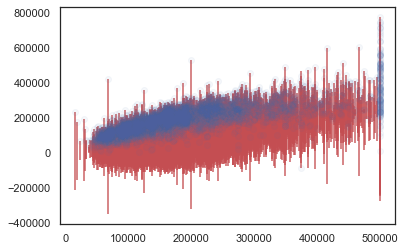

In [883]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.vlines(y_test,y_pred_base,residuals,color='r', alpha=0.9)

color = ['r','b']
plt.plot(y_test, y_pred_base, 'o', label='Data', alpha=0.050)


plt.show()

In [884]:
reg_base.intercept_

10838.71249470915

In [159]:
y_pred_base.shape

(4128,)

In [929]:
y_test.shape

(4128,)

In [315]:
reg_base.intercept_

-3485122.686519399